In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_classification

%matplotlib inline

### About odds ratios.
> We may refer to this at some point.

The initial step in the logit link function involves the use of odds ratios. Before we get into why, it's important to understand what an odds ratio is.

Probabilities and odds ratios represent the same thing in different ways. Probabilities can be alternatively expressed as odds ratios. The odds ratio for probability p is defined:

$$\text{odds ratio}(p) = \frac{p}{1-p}$$
The odds ratio of a probability is a measure of how many times more likely it is than the inverse case.

For example:

* When p = 0.5: odds ratio = 1
  * it is equally likely to happen as it is to not happen.
* When p = 0.75: odds ratio = 3
  * it is 3 times more likely to happen than not happen.
* When p = 0.40: odds ratio = 0.666..
  * it is 2/3rds as likely to happen than not happen.

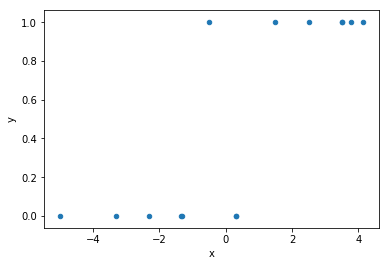

In [2]:
data = [
    (1,2.5),
    (0,-5),
    (1, 3.5),
    (1, 3.5),
    (1, -.5),
    (0, .3),
    (0, -1.34),
    (1, 3.77),
    (1, 4.15),
    (1, 1.5),
    (0, .3),
    (0, -3.3),
    (0, -2.3),
    (0, -1.3),
]

df = pd.DataFrame(data, columns=["y", "x"])
df.plot(kind="scatter", x="x", y="y")

In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
model = reg.fit(df[['x']], df['y'])
y_hat = model.predict(df[['x']])
y_hat

array([ 0.80251924, -0.28456221,  0.94746343,  0.94746343,  0.36768666,
        0.48364201,  0.24593354,  0.98659836,  1.04167716,  0.65757504,
        0.48364201, -0.03815708,  0.10678711,  0.2517313 ])

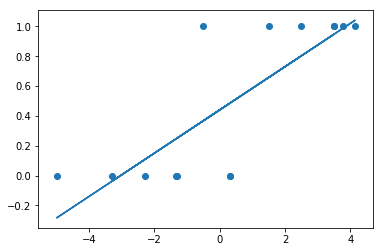

In [4]:
plt.plot(df['x'], y_hat)
plt.scatter(df['x'], df['y'])

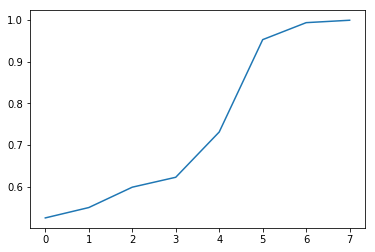

In [5]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

x_10  = np.linspace(-10, 10, 10)
x_100 = np.linspace(-10, 10, 100)
x_small = np.array([.1, .2, .4, .5, 1, 3, 5, 7])

plt.plot(sigmoid(x_small))


### Create a class called BasicLogisticRegression
- Set class variable gradient_steps with a default of 30000
- Set class variable learning_rate with a default of .0002
- Give it an init function with gradient_steps and learning_rate parameters, default to false

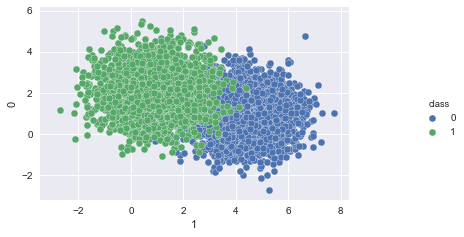

In [7]:
import seaborn as sns

# generate random data
X, y = make_blobs(n_samples=6000, centers=2, n_features=2, random_state=0)
df = pd.DataFrame(X)
df['class'] = y

g = sns.pairplot(df, x_vars=1, y_vars=0, hue="class")
g.fig.set_size_inches(8, 4)

In [31]:
df.head()

,0,1,class
0,0.003867,5.650008,0
1,-1.134097,5.376611,0
2,4.066162,1.034520,1
3,3.011615,0.783186,1
4,1.396821,1.599334,1


In [8]:
class BasicLogisticRegression:
    
    # Class variables
    gradient_steps = 120000
    learning_rate = .00002
    coefficients = False
    
    def __init__(self, gradient_steps = False, learning_rate = False):
        
        if gradient_steps:
            self.gradient_steps = gradient_steps
            
        if learning_rate:
            self.learning_rate = learning_rate
    
    def sigmoid(self, y_hat):
        return 1 / (1 + np.exp(-y_hat))
    
    # create method for optimizing weights
    def optimize_weights(self, X, y, coefficients):
        
        for step in range(self.gradient_steps):
            # print("step", step)
            y_hat = np.dot(X, coefficients)
            y_hat = self.sigmoid(y_hat)
            
            self.y_hat = y_hat
            
            error = y - y_hat
            gradient = np.dot(X.T, error)
            coefficients += self.learning_rate * gradient
            
            if step % 4999 == 0:
                print("Coef @ step %d" % step, coefficients)
            ## print("Prediction at step %d: " % step, y_hat)
            
            ##  (intercept * coef[0]) + (X[:, 0] * coef[1]) + (X[:, 1] * ceof[2])
    
    def fit(self, X, y):
        
        ## We will build a basic linear regression using OLS form 
        ## And then pass it to a sigmoid
        matrix_length = X.shape[0]
        intercept = np.ones(shape=(matrix_length, 1))
        
        X = np.concatenate((intercept, X), axis=1)
        
        # print("Matrix length: ", matrix_length)
        # print("intercept: ", intercept)
        # print("Original data with beta_0", X)
        
        matrix_width = X.shape[1]
        coefficients = np.zeros(shape=matrix_width)
        self.optimize_weights(X, y, coefficients)
        
        self.coefficients = coefficients
        
        print("Coefs: ", coefficients)
        
reg = BasicLogisticRegression(gradient_steps=150000)
reg.fit(X, y)

Coef @ step 0 [ 0.          0.03315942 -0.1029524 ]
Coef @ step 4999 [ 5.84548103  1.17376829 -2.98824668]
Coef @ step 9998 [ 6.80274091  1.14369831 -3.32164094]
Coef @ step 14997 [ 7.16371239  1.13778819 -3.45111534]
Coef @ step 19996 [ 7.31973557  1.13600747 -3.50761482]
Coef @ step 24995 [ 7.39058651  1.13534339 -3.53337182]
Coef @ step 29994 [ 7.42344     1.13506526 -3.54533599]
Coef @ step 34993 [ 7.43881802  1.13494147 -3.5509406 ]
Coef @ step 39992 [ 7.44604745  1.13488468 -3.55357639]
Coef @ step 44991 [ 7.44945301  1.13485824 -3.55481824]
Coef @ step 49990 [ 7.45105879  1.13484584 -3.55540384]
Coef @ step 54989 [ 7.45181628  1.13484001 -3.5556801 ]
Coef @ step 59988 [ 7.45217368  1.13483726 -3.55581044]
Coef @ step 64987 [ 7.45234233  1.13483596 -3.55587195]
Coef @ step 69986 [ 7.45242192  1.13483535 -3.55590098]
Coef @ step 74985 [ 7.45245948  1.13483506 -3.55591468]
Coef @ step 79984 [ 7.4524772   1.13483493 -3.55592114]
Coef @ step 84983 [ 7.45248556  1.13483486 -3.55592419

In [9]:
# Inspect coefficients
df['y_hat'] = np.round(reg.y_hat, 4)

In [92]:
df['y_hat_class'] = df['y_hat'].map(lambda p: 1 if p >=.5 else 0)

In [93]:
df.head()

,0,1,class,y_hat,y_hat_class
0,0.003867,5.650008,0,0.0000,0
1,-1.134097,5.376611,0,0.0000,0
2,4.066162,1.034520,1,0.9998,1
3,3.011615,0.783186,1,0.9997,1
4,1.396821,1.599334,1,0.9661,1


In [94]:
from sklearn.metrics import accuracy_score

accuracy_score(y, df['y_hat_class'])

0.96533333333333338